In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv('data.csv')
X = data['X'].values.reshape(-1, 1)
y = data['y'].values.reshape(-1, 1)

In [5]:
def normalize(X):
    return (X - np.mean(X)) / np.std(X)

X_norm = normalize(X)
y_norm = normalize(y)

theta = np.random.randn(2, 1)

In [6]:
def compute_cost(X, y, theta):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (x0 = 1)
    predictions = X_b.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [7]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (x0 = 1)
    cost_history = []

    for _ in range(iterations):
        predictions = X_b.dot(theta)
        gradients = (1 / m) * X_b.T.dot(predictions - y)
        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

Optimal theta: [[9.90983357e-16]
 [8.77082403e-01]]
Cost history: [2.0268377574513403, 1.6636575971062504, 1.3694816672267274, 1.1311991640243142, 0.9381903364303594, 0.7818531860792557, 0.655220094294862, 0.5526472899495031, 0.4695633184297622, 0.4022653014987724, 0.3477539077846704, 0.30359967887624795, 0.26783475346042573, 0.2388651638736097, 0.2153997963082888, 0.19639284858037873, 0.18099722092077167, 0.1685267625164899, 0.1584256912090217, 0.15024382344997245, 0.14361651056514255, 0.13824838712843035, 0.13390020714469347, 0.1303781813578666, 0.12752534047053682, 0.12521453935179971, 0.12334279044562262, 0.12182667383161923, 0.12059861937427645, 0.1196038952638288, 0.11879816873436622, 0.1181455302455015, 0.11761689306952111, 0.11718869695697698, 0.11684185810581625, 0.116560918636376, 0.11633335766612947, 0.11614903328022974, 0.11599973052765103, 0.11587879529806219, 0.11578083776209525, 0.11570149215796205, 0.11563722221861414, 0.11558516356774233, 0.11554299606053615, 0.1155088

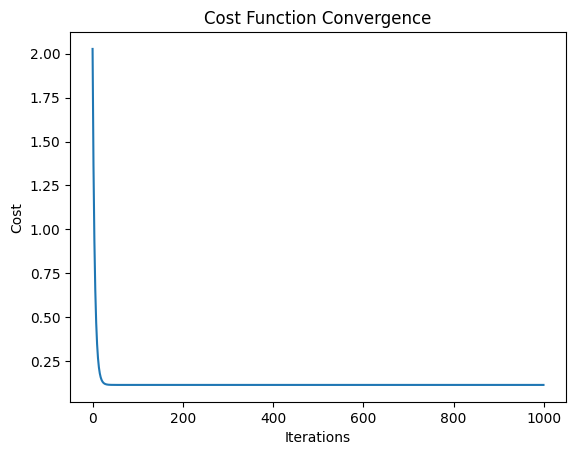

In [8]:
learning_rate = 0.1
iterations = 1000

theta_optimal, cost_history = gradient_descent(X_norm, y_norm, theta, learning_rate, iterations)

print("Optimal theta:", theta_optimal)
print("Cost history:", cost_history)

# Optional step
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()